### fashion_mnist

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
np.unique(y_train, return_counts=True) # uint8은 부호없는 정수이기 때문에 float로 변경 작업 필요

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

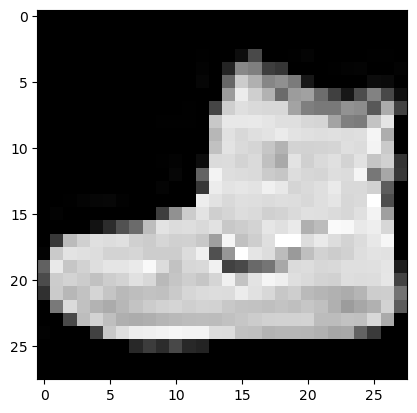

In [6]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [8]:
X_train = (X_train/255.).reshape(-1, 28, 28, 1) # 마지막이 1인 이유? 흑백이라서..
X_test = (X_test/255.).reshape(-1, 28, 28, 1)

In [7]:
## y-onehot 인코딩
y_train_hot = keras.utils.to_categorical(y_train)
y_test_hot = keras.utils.to_categorical(y_test)
print(y_train_hot.shape)
print(y_train_hot[0])

(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [49]:
del model

NameError: name 'model' is not defined

In [50]:
model = keras.Sequential(name='mnist_cnn')
model.add(keras.layers.Conv2D(32, input_shape = (28, 28, 1), kernel_size = (5,5), activation='relu'))
model.add(keras.layers.Conv2D(64, kernel_size = (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "mnist_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 conv2d_24 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 6400)              0         
                                                                 
 dense_21 (Dense)            (None, 128)               819328    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                         

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc')
model_path='./model/fashion2_mnist_best_cnn.hdf5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=model_path, verbose=1, save_best_only=True)
earlystop = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train, y_train_hot, validation_split=0.3, epochs=100, batch_size=200, callbacks=[checkpoint,earlystop])

model.evaluate(X_test, y_test_hot)

Epoch 1/100
210/210 [==============================] - ETA: 0s - loss: 0.6212 - acc: 0.7778
Epoch 1: val_loss improved from inf to 0.39209, saving model to ./model\fashion2_mnist_best_cnn.hdf5
210/210 [==============================] - 21s 95ms/step - loss: 0.6212 - acc: 0.7778 - val_loss: 0.3921 - val_acc: 0.8575
Epoch 2/100
210/210 [==============================] - ETA: 0s - loss: 0.3797 - acc: 0.8641
Epoch 2: val_loss improved from 0.39209 to 0.33137, saving model to ./model\fashion2_mnist_best_cnn.hdf5
210/210 [==============================] - 20s 94ms/step - loss: 0.3797 - acc: 0.8641 - val_loss: 0.3314 - val_acc: 0.8807
Epoch 3/100
210/210 [==============================] - ETA: 0s - loss: 0.3235 - acc: 0.8843
Epoch 3: val_loss improved from 0.33137 to 0.29777, saving model to ./model\fashion2_mnist_best_cnn.hdf5
210/210 [==============================] - 20s 94ms/step - loss: 0.3235 - acc: 0.8843 - val_loss: 0.2978 - val_acc: 0.8922
Epoch 4/100
210/210 [=======================

[0.3364604115486145, 0.9171000123023987]

In [58]:
model_imported = keras.models.load_model('./model/fashion0_mnist_best_cnn.hdf5')
model_imported.evaluate(X_test, y_test_hot)

313/313 [==============================] - 3s 9ms/step - loss: 0.2398 - acc: 0.9163


[0.23981469869613647, 0.9162999987602234]